In [39]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

from matplotlib.patches import Polygon
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline

In [104]:
# create lon and lat to plot on the map
lat = np.linspace(70, 90, 20)
lon = np.linspace(-180, 180, 20)

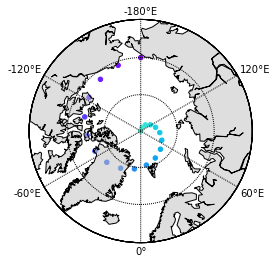

In [105]:
colors = cm.rainbow(np.linspace(0, 1, 50))

fig = plt.figure()
m = Basemap(projection='npstere', lon_0=0,boundinglat=60, round="True")
#North-Polar Stereographic
m.drawcoastlines()
m.fillcontinents(color = '0.75',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1],latmax=90)
x,y = m(lon,lat)  #convert lon/lat (in degrees) to x/y map projection coordinates (in meters).
m.scatter(x,y,color=colors)
plt.show()

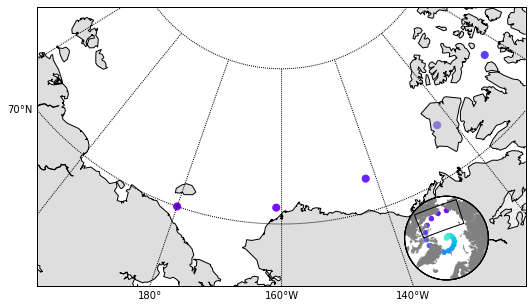

In [106]:
fig, ax = plt.subplots(figsize=(10,5))

m = Basemap(width =3.5e6,height =2e6,lon_0=-160, lat_0=75,
                projection='stere', resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,20.),labels=[0, 0, 0, 1])
x,y = m(lon,lat)
m.scatter(x,y,color=colors,s=50)
m.ax = ax


# add inset

axin = inset_axes(m.ax, width='30%', height='30%', loc=4)

inmap = Basemap(projection='npstere', lon_0=0,boundinglat=60, round="True", ax=axin)
inmap.fillcontinents('grey')
x,y = inmap(lon,lat)
inmap.scatter(x,y,color=colors)
# draw an area
bx , by = inmap(m.boundarylons, m.boundarylats)
xy = list(zip(bx, by))
mapboundary = Polygon(xy, edgecolor='k', linewidth=1, fill=False)
inmap.ax.add_patch(mapboundary)


plt.show()

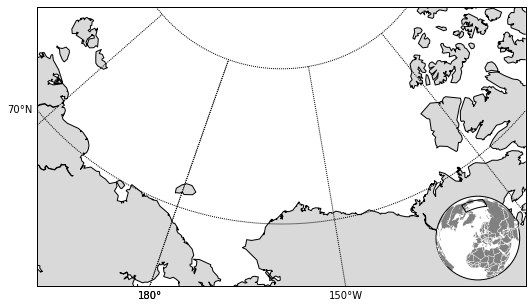

In [78]:
fig, ax = plt.subplots(figsize=(10,5))
m = Basemap(width =3.5e6,height =2e6,lon_0=-160, lat_0=75,
            projection='stere', resolution='l')
m.drawcoastlines()
m.fillcontinents(color='0.85')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,30.),labels=[0, 0, 0, 1])
m.ax = ax

#add inset
axin = inset_axes(m.ax, width="30%", height="30%", loc=4)
# Global inset map.
inmap = Basemap(projection='ortho', lon_0=0, lat_0=50,
                ax=axin, anchor='NE') #Orthographic
inmap.fillcontinents(color='gray')
inmap.drawcountries(color='white')
bx, by = inmap(m.boundarylons, m.boundarylats)
xy = list(zip(bx, by))
mapboundary = Polygon(xy, edgecolor='k', linewidth=1, fill=False)
inmap.ax.add_patch(mapboundary)

plt.show()